In [4]:
import numpy as np
import pandas as pd



from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color_pallet = sns.color_palette()
color_pallet


[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [5]:
df_train = pd.read_csv(r'C:\Users\derek.filko\DataspellProjects\Kaggle\Store Sales\data\train.csv',
                       usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,)
df_train.head()

,date,store_nbr,family,sales
0,2013-01-01,1,AUTOMOTIVE,0.0
1,2013-01-01,1,BABY CARE,0.0
2,2013-01-01,1,BEAUTY,0.0
3,2013-01-01,1,BEVERAGES,0.0
4,2013-01-01,1,BOOKS,0.0


In [6]:
df_train['date'] = df_train.date.dt.to_period('D')

In [7]:
df_train = df_train.set_index(['store_nbr','family','date']).sort_index()

In [8]:
df_train.shape


(3000888, 1)

In [9]:
df_train.head()

sales
store_nbr family     date             
1         AUTOMOTIVE 2013-01-01    0.0
                     2013-01-02    2.0
                     2013-01-03    3.0
                     2013-01-04    3.0
                     2013-01-05    5.0

<AxesSubplot:xlabel='date'>

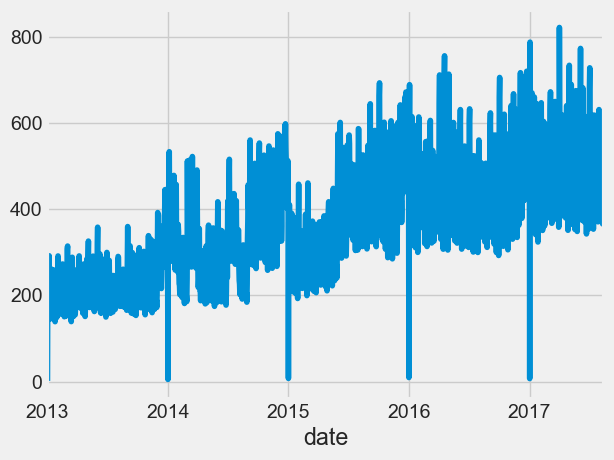

In [10]:
avarage_sales = df_train.groupby('date').mean().squeeze()
avarage_sales.plot()

In [11]:
avarage_sales = (
    df_train
    .groupby('date').mean()
    .squeeze().loc['2017']
)

In [12]:
y = df_train.unstack(['store_nbr','family']).loc['2017']

In [13]:
fourier = CalendarFourier(freq ="M",order=12)

dp = DeterministicProcess(
index=y.index,
constant=True,
order=1,
additional_terms=[fourier],
drop=True
)
X= dp.in_sample()
X['NewYear'] = X.index.dayofyear ==1

In [20]:
X

,const,trend,"sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)",...,"cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)",NewYear
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.0,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,True
2017-01-02,1.0,2.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967,...,-0.050649,0.968077,-0.250653,0.897805,-0.440394,0.790776,-0.612106,0.651372,-0.758758,False
2017-01-03,1.0,3.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649,...,-0.994869,-0.485302,-0.874347,-0.790776,-0.612106,-0.968077,-0.250653,-0.988468,0.151428,False
2017-01-04,1.0,4.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758,...,0.151428,-0.724793,0.688967,-0.201299,0.979530,0.394356,0.918958,0.848644,0.528964,False
2017-01-05,1.0,5.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869,...,0.979530,0.848644,0.528964,0.968077,-0.250653,0.485302,-0.874347,-0.299363,-0.954139,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,1.0,223.0,0.897805,-0.440394,-0.790776,-0.612106,-0.201299,0.979530,0.968077,-0.250653,...,-0.874347,-0.571268,0.820763,0.988468,0.151428,-0.299363,-0.954139,-0.724793,0.688967,False
2017-08-12,1.0,224.0,0.790776,-0.612106,-0.968077,-0.250653,0.394356,0.918958,0.485302,-0.874347,...,0.528964,0.937752,0.347305,-0.299363,-0.954139,-0.571268,0.820763,0.998717,-0.050649,False
2017-08-13,1.0,225.0,0.651372,-0.758758,-0.988468,0.151428,0.848644,0.528964,-0.299363,-0.954139,...,0.820763,0.101168,-0.994869,-0.724793,0.688967,0.998717,-0.050649,-0.790776,-0.612106,False


In [15]:
model_rf = RandomForestRegressor(n_estimators=250,random_state=2022, verbose=0)

model_rf.fit(X, y)

RandomForestRegressor(n_estimators=250, random_state=2022)

In [16]:
y_pred = pd.DataFrame(model_rf.predict(X), index=X.index, columns=y.columns)

In [21]:
y_pred

sales                                                 \
store_nbr           1                                                  
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES  BOOKS BREAD/BAKERY   
date                                                                   
2017-01-01      1.608       0.0  1.280   819.020  0.188   144.787423   
2017-01-02      3.976       0.0  1.172  1492.740  0.220   207.400348   
2017-01-03      3.932       0.0  4.324  2650.536  1.336   448.468141   
2017-01-04      2.264       0.0  3.820  2673.556  1.476   470.790157   
2017-01-05      2.076       0.0  2.756  2306.408  0.260   445.052456   
...               ...       ...    ...       ...    ...          ...   
2017-08-11      2.600       0.0  1.952  1397.240  0.180   207.144751   
2017-08-12      5.548       0.0  3.436  1804.840  0.024   276.657818   
2017-08-13      2.732       0.0  2.288  1226.208  0.012   204.409397   
2017-08-14      2.120       0.0  4.744  2141.552  0.276   323.472563   
2017-08-15      4.476       0.0  4.016  1984.628  0.004   321.917717   

                                                      ...            \
store_nbr                                             ...         9   
family     CELEBRATION CLEANING    DAIRY        DELI  ... MAGAZINES   
date                                                  ...             
2017-01-01       2.392  278.196  286.036   46.258880  ...     1.512   
2017-01-02       3.884  402.860  436.712   61.412820  ...     3.844   
2017-01-03      13.752  827.028  898.244  174.593134  ...     3.244   
2017-01-04      14.512  873.548  902.296  129.147072  ...     3.460   
2017-01-05      27.856  772.992  758.408  125.559638  ...     2.260   
...                ...      ...      ...         ...  ...       ...   
2017-08-11       7.936  452.244  460.484   83.335606  ...     4.680   
2017-08-12       5.776  452.260  580.012  106.005783  ...     2.648   
2017-08-13       5.676  313.052  416.816   72.932028  ...     2.996   
2017-08-14       8.240  582.040  670.844  149.118061  ...     8.832   
2017-08-15      18.748  654.700  606.216  117.287421  ...     8.140   

                                                                           \
store_nbr                                                                   
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-01-01  186.516798       290.288        3.352                   6.736   
2017-01-02  529.753992       922.408        8.784                  29.144   
2017-01-03  491.625640       758.028        6.844                  15.452   
2017-01-04  422.345404       658.080        7.152                  13.880   
2017-01-05  480.955275       647.540        7.744                  12.904   
...                ...           ...          ...                     ...   
2017-08-11  331.159338       379.872        9.396                   3.928   
2017-08-12  289.527994       406.508        7.168                   8.840   
2017-08-13  361.608204       470.272        4.900                   9.044   
2017-08-14  332.008156       424.060        3.328                  11.364   
2017-08-15  410.432540       505.636        7.472                   7.544   

                                                                               \
store_nbr                                                                       
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2017-01-01  219.010038      49.531847   755.665761                      1.372   
2017-01-02  649.370486     105.645705  2427.899368                      1.368   
2017-01-03  637.943856     121.946649  2620.404354                      1.488   
2017-01-04  538.722578     101.283266  1695.216154                      5.008   
2017-01-05  477.440406     118.723582  1809.191690               

In [18]:
df_test = pd.read_csv(
    r'C:\Users\derek.filko\DataspellProjects\Kaggle\Store Sales\data\test.csv',
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_test['date'] = df_test.date.dt.to_period('D')
df_test = df_test.set_index(['store_nbr', 'family', 'date']).sort_index()

# Create features for test set
X_test = dp.out_of_sample(steps=16)
X_test.index.name = 'date'
X_test['NewYear'] = (X_test.index.dayofyear == 1)

In [19]:
y_submit_rf = pd.DataFrame(model_rf.predict(X_test), index=X_test.index, columns=y.columns)
y_submit_rf= y_submit_rf.stack(['store_nbr', 'family'])
y_submit_rf = y_submit_rf.join(df_test.id).reindex(columns=['id', 'sales'])
y_submit_rf.to_csv('submission.csv', index=False)